# Содержание
1. [Обзор данных.](#intro) 
2. [Предобработка данных.](#intro1) 
3. [Расчёт значений и создание новых столбцов.](#intro2)
4. [Исследовательский анализ данных.](#intro3)
5. [Общий вывод](#intro4)

# Исследование данных о российском кинопрокате



Заказчик — Министерство культуры Российской Федерации.

**Цель исследования** - изучить рынок российского кинопроката и выявить текущие тренды. Также, уделить внимание фильмам, которые получили государственную поддержку и ответить на вопрос, насколько такие фильмы интересны зрителю.

**Ход исследования**

Перед нами два файла с данными, которые необходимо объединить в единый файл. Для начала получим данные о прокатных удостоверениях из файла `mkrf_movies.csv` и данные о прокате в российских кинотеатрах из файла `mkrf_shows.csv`. После объединим данные из двух файлов в единый, сохраняя все объекты из файла `mkrf_movies.csv`. О качестве данных ничего не известно. Поэтому перед дальнейшим анализом понадобится обзор данных. Проверим данные на ошибки и оценим их влияние на исследование. Далее, на этапе предобработки, поищем возможности исправить критические ошибки данных. 

После того, как все данные будут корректны, приступим к исследовательскому анализу данных.

# 1. Обзор данных <a id='intro'></a>

Откроем файлы с данными и объединим их таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм.  

In [1]:
# импорт библиотеки pandas

import pandas as pd

# импорт библиотеки matplotlib

import matplotlib.pyplot as plt

In [2]:
# перевод экспоненциальных чисел в десятичные и 
# округление до двух знаков после запятой

pd.set_option('display.float_format', lambda x: '%.2f' % x) 

In [3]:
# чтение данных с файлами, сохранение в df и df1 

try:
    df = pd.read_csv('/datasets/mkrf_movies.csv')
    df1 = pd.read_csv('/datasets/mkrf_shows.csv')
except:
    df = pd.read_csv('mkrf_movies.csv')
    df1 = pd.read_csv('mkrf_shows.csv')

In [4]:
# получение первых 5 строк таблицы df

df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер"


In [5]:
# получение первых 5 строк таблицы df1

df1.head()

,puNumber,box_office
0,111000113,2450.00
1,111000115,61040.00
2,111000116,153030013.40
3,111000117,12260956.00
4,111000118,163684057.79


In [6]:
# получение общей информации о данных в таблице df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
title                    7486 non-null object
puNumber                 7486 non-null object
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
dtypes: float64(3), object(12)
memory usage: 877.4+ KB


In [7]:
# получение общей информации о данных в таблице df1

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
puNumber      3158 non-null int64
box_office    3158 non-null float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [8]:
# перевод значений столбца 'puNumber' в числовой тип 'float' и
# указание метода в котором некорректные значения принудительно 
# заменяются на NaN

df['puNumber'] = pd.to_numeric(df['puNumber'], errors = 'coerce')

In [9]:
# получение среза в столбце 'puNumber' таблицы df

df.query('puNumber.isna()')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),nan,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,NaN,NaN


In [10]:
# замена пропущенного значения на '0' 
# в столбце 'puNumber' таблицы df

df['puNumber'] = df['puNumber'].fillna(0)

In [11]:
# перевод значений столбца 'puNumber' в тип данных 'int'

df['puNumber'] = df['puNumber'].astype('int')

In [12]:
# объединение двух таблиц в единую

df = df.merge(df1, on = 'puNumber', how = 'left')

In [13]:
# получение последних 15 строк таблицы df

df.tail(15)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7471,Реальная любовь в Нью-Йорке,121038219,2019-12-19T12:00:00.000Z,Художественный,"Креатив Энлэйнс, Арт, Копенгаген Филм, Дет Дан...",Дания - Канада - Швеция - Франция - Германия -...,Лоне Шерфиг,"Малене Бленков, Сандра Каннингэм",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,6.1,драма,3143790.50
7472,Черное Рождество,121038319,2019-12-19T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Блюмхауз Продакшнз, Дивид/К...",США - Новая Зеландия,Софи Такал,Джесси Хендерсон,«18+» - запрещено для детей,nan,nan,nan,NaN,3.9,"ужасы,триллер,детектив",18001772.43
7473,Ходячий замок,124010519,2019-12-19T12:00:00.000Z,Анимационный,"Студио Гибли, Буена Виста Хоум Интертейнмент, ...",Япония,Хаяо Миядзаки,"Томохико Исии, Хаяо Миядзаки, Тосио Судзуки",«6+» - для детей старше 6 лет,nan,nan,nan,NaN,8.3,"аниме,мультфильм,фэнтези",nan
7474,Вторжение,111022519,2019-12-23T12:00:00.000Z,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.00,400000000.00,944000000.00,Фонд кино,5.7,"фантастика,боевик",nan
7475,Папа,111022919,2019-12-24T12:00:00.000Z,Художественный,"ООО ""Киношкола имени Сергея Федоровича Бондарч...",Россия,К.Чувикова,"ООО ""Киношкола имени Сергея Федоровича Бондарч...",«18+» - запрещено для детей,nan,nan,nan,NaN,8.2,драма,nan
7476,Я свободен,111023019,2019-12-26T12:00:00.000Z,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.00,30000000.00,46154000.00,Министерство культуры,5.9,драма,nan
7477,Тридцать,121038419,2019-12-26T12:00:00.000Z,Художественный,Демнехст ауф видео,Германия,Симона Костова,Джейлан Атаман-Джека,«16+» - для детей старше 16 лет,nan,nan,nan,NaN,6.3,драма,nan
7478,(Не)идеальный мужчина,111023119,2019-12-24T12:00:00.000Z,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,М.Бальчюнас (псевдоним М.Вайсберг),"С.Мелькумов, А.Роднянский, М.Вайсберг, Р.Минас...",«12+» - для детей старше 12 лет,40000000.00,60000000.00,150147502.00,Фонд кино,4.5,"комедия,фантастика,мелодрама",nan
7479,Эколав,111023219,2019-12-26T12:00:00.000Z,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,nan,nan,nan,NaN,NaN,NaN,nan
7480,Акрам Хан: Родом из Карри Хауса,126007919,2019-12-23T12:00:00.000Z,Прочие,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",«12+» - для детей старше 12 лет,nan,nan,nan,NaN,NaN,NaN,219569.00


In [14]:
# получение общей информации о данных в таблице df

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
puNumber                 7486 non-null int64
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: float64(4), int64(1), object(11)
memory usage: 994.2+ KB


In [15]:
# получение информации об описательных статиcтических данных
# в таблице df

df.describe()

,puNumber,refundable_support,nonrefundable_support,budget,box_office
count,7486.00,332.00,332.00,332.00,3158.00
mean,135178527.64,11864457.83,48980988.89,127229716.68,76478696.16
std,38382177.41,24916555.26,59980117.92,188588333.12,240353122.82
min,0.00,0.00,0.00,0.00,0.00
25%,112025043.00,0.00,25000000.00,42000000.00,86239.00
50%,121015464.50,0.00,30000000.00,68649916.00,2327987.55
75%,124003313.75,15000000.00,40375000.00,141985319.50,23979671.02
max,231001111.00,180000000.00,400000000.00,2305074303.00,3073568690.79


Итак, в таблице 16 столбцов. У столбцов наблюдается 3 типа данных: `float64`, `int64`, `object`.

Согласно документации к данным:

* `title` - название фильма;
* `puNumber` - номер прокатного удостоверения;
* `show_start_date` - дата премьеры фильма;
* `type` - тип фильма;
* `film_studio` - студия-производитель;
* `production_country` - страна-производитель;
* `director` - режиссёр;
* `producer` - продюсер;
* `age_restriction` - возрастная категория;
* `refundable_support` - объём возвратных средств государственной поддержки;
* `nonrefundable_support` -  объём невозвратных средств государственной поддержки;
* `budget` - общий бюджет фильма;
* `financing_source` - источник государственного финансирования;
* `ratings` - рейтинг фильма на КиноПоиске;
* `genres` - жанр фильма;
* `box_office` - сборы в рублях.

В названиях столбцов отсутствует нарушение стиля, кроме столбца `puNumber`, все буквы в названии данного столцба можно привести к нижнему регистру и добавить нижнее подчёркивание.

Также, в столбцах `film_studio`, `production_country`, `director`, `producer`, `refundable_support`, `nonrefundable_support`, `budget`, ` financing_source`, `ratings`, `genres` и `box_office` присутствует меньшее количество значений, чем  в остальных столбцах, следовательно, в данных есть пропущенные значения.

В столбцах `refunable_support`, `nonrefunable_support` и `budget` необходимо перевести значения к типу `int` (целые числа) , а в столбце `ratings` необходимо перевести значения к типу `float` (вещественные числа) для удобства просмотра и дальнейшего анализа даннных. 

В столбце `show_stat_date` необходимо изменить тип данных на `datetime` и убрать часовой пояс.

**Вывод**

В каждом столбце представлена информация о фильмах, в одних столбцах данные более описательного характера, а именно: название фильма, дата премьеры, тип и жанр фильма, студия-производитель, страна-производитель, режиссёр, продюсер, возрастная категория и рейтинг фильма на КиноПоиске. А в других столбцах данные относятся к финансовой составляющей: объём возвратных и невозвратных средств государственной поддержки, общий бюджет фильма, источник государственного финансирования, сборы в рублях. Также есть отдельный столбце в котором представлена информация о номере прокатного удостоверения фильма.

Для более точного и правильного анализа данных необходимо:

* заменить по возможности пропущенные значения в столбцах `film_studio`, `production_country`, `director`, `producer`, `refundable_support`, `nonrefundable_support`, `budget`, ` financing_source`, `ratings`, `genres` и `box_office`;
* перевести значения к типу `int` в столбцах `refunable_support`, `nonrefunable_support` и `budget`;
* перевести значения к типу `float` в столбце `ratings`;
* изменить в столбце `show_stat_date` тип данных на `datetime` и убрать часовой пояс;
* привести название столбца `puNumber` к нижнему регистру и добавить нижнее подчёркивание. 

Также, для объединения двух таблиц в единую, мы уже на этом этапе в столбце `puNumber` заменили пропуски на `0` и привели значения к числовому типу данных.

# 2. Предобработка данных <a id='intro1'></a>

In [16]:
# подсчёт пропущенных значений

df.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

In [17]:
# подсчёт явных дубликатов

df.duplicated().sum()

0

Явных дубликатов в таблице `df` не наблюдается, посмотрим далее отдельно по столбцам наличие неявных дубликатов.

In [18]:
# получение уникальных значений
# столбца "title"

sorted(df['title'].unique())

[' Я ПРЕПОД',
 '"SOS" над тайгой',
 '"V" значит вендетта',
 '"АРТиШОК" анимационный альманах авторских фильмов',
 '"Бежин луг" Сергея Эйзенштейна',
 '"Державная" Размышления 100 лет спустя',
 '"Зеленое яблоко" анимационный альманах выпуск № 7',
 '"Машины песенки". Серия "Опять Новый Год!"',
 '"Море"',
 '"Сезон дождей", "Диета Матроскина", "Шарик хочет телефон" из анимационного сериала "Простоквашино"',
 '"Старый" Новый год',
 '"Уорнер Бразерс Пикчерз" и "Леджендари Пикчерз": Тихоокеанский рубеж',
 '"Фееринки". Серия "Фантик спешит на помощь"',
 '"Хороший день", "Бог из машины/Deus EX", "Голод", "Психотроника", "Темная ночь"',
 '"Чудовище из Простоквашино", "Ген героя", "Ненастоящий детектив", "Мама и Тама", "Как бы не стало зимы" из анимационного сериала "Простоквашино"',
 '#ВСЁ_ИСПРАВИТЬ!?!',
 '#Москва-Руаян',
 '#ЯВОЛОНТЕР Истории неравнодушных',
 '(Не)жданный принц',
 '(Не)идеальный мужчина',
 '... в стиле JAZZ',
 '... и я там был',
 '... имени Сергея Герасимова',
 '007 Координаты Ск

Как мы видим в столбце `title` есть значения у которых в начале и в конце строки присутствуют лишние символы: `-`, `_`, `.`, `...` (тире, нижнее подчёркивание, точка и многоточие). Есть одинаковые названия фильмов, которые различаются только символом в конце слова, например `возмездие.` и `возмездие`, `10 лет спустя.` и `10 лет спустя` 

Возможно, неявные дубликаты могли возникнуть по причине того, что выгрузка данных происходила из разных источников, где одно и то же название могло быть записано по разному.

Также, стоит отметить, что значения записаны в разном регистре, где то названия фильмов написаны заглавными буквами, где то строчными. 

Поэтому необходимо привести все названия к единому формату, то есть к нижнему регистру, и убрать лишние символы в начале и в конце строки для более удобного просмотра и цельной картины.

In [19]:
# приведение значений в столбце 'title'
# к нижнему регистру и 
# удаление лишних символов в начале и в конце строки

df['title'] = df['title'].str.lower().str.strip('_\-\.\ ') 

In [20]:
# получение уникальных значений
# столбца "title"

sorted(df['title'].unique())

['"sos" над тайгой',
 '"v" значит вендетта',
 '"артишок" анимационный альманах авторских фильмов',
 '"бежин луг" сергея эйзенштейна',
 '"державная" размышления 100 лет спустя',
 '"зеленое яблоко" анимационный альманах выпуск № 7',
 '"машины песенки". серия "опять новый год!"',
 '"море"',
 '"сезон дождей", "диета матроскина", "шарик хочет телефон" из анимационного сериала "простоквашино"',
 '"старый" новый год',
 '"уорнер бразерс пикчерз" и "леджендари пикчерз": тихоокеанский рубеж',
 '"фееринки". серия "фантик спешит на помощь"',
 '"хороший день", "бог из машины/deus ex", "голод", "психотроника", "темная ночь"',
 '"чудовище из простоквашино", "ген героя", "ненастоящий детектив", "мама и тама", "как бы не стало зимы" из анимационного сериала "простоквашино"',
 '#всё_исправить!?!',
 '#москва-руаян',
 '#яволонтер истории неравнодушных',
 '(не)жданный принц',
 '(не)идеальный мужчина',
 '007 координаты скайфолл',
 '007: спектр',
 '1+1',
 '1+1. нарушая правила',
 '1+1: голливудская история',

In [21]:
# изменение названия столбца 'puNumber'

df.rename(columns = {'puNumber' : 'pu_number'}, inplace = True)

In [22]:
# просмотр уникальных значений столбца 'pu_number'

df['pu_number'].value_counts()

221054410    2
221154310    2
114001919    1
221025616    1
221136210    1
            ..
121034419    1
112025418    1
111008518    1
121000711    1
0            1
Name: pu_number, Length: 7484, dtype: int64

In [23]:
# получение среза данных по столбцу 'pu_number'

df.query('pu_number == "221054410"')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5067,анализируй это!,221054410,2010-05-25T12:00:00.000Z,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.4,"комедия,криминал",nan
5068,анализируй то!,221054410,2010-05-25T12:00:00.000Z,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,nan,nan,nan,NaN,6.8,"комедия,криминал",nan


In [24]:
# получение среза данных по столбцу 'pu_number'

df.query('pu_number == "221154310"')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,как жениться и остаться холостым,221154310,2010-12-17T12:00:00.000Z,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.0,"мелодрама,комедия",nan
4639,иоанна - женщина на папском престоле /по роман...,221154310,2010-12-17T12:00:00.000Z,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.6,"драма,мелодрама,история",nan


Как мы видим, в столбце `pu_number` есть 4 фильма у которых одинаковые номера прокатного удостоверения. Стоит отметить, что даты выхода у них тоже совпадают.

Следовательно, необходимо удалить данные строки, так как прокатное удостоверение выдается на определённый фильм с уникальным номером и не может быть у фильма с другим названием.

In [25]:
# удаление строк из таблицы df, где
# в столбце 'pu_number' находятся дубликаты

df = df.drop(index = [4638,4639]).reset_index(drop = True)
df = df.drop(index = [5067,5068]).reset_index(drop = True)

In [26]:
# просмотр среза данных 
# по значениям столбца 'pu_number'

df.query('pu_number == "221054410" and pu_number == "221154310"')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


In [27]:
# перевод значений столбца 'first_day_exposition' в тип данных 'datetime' и
# удаление часового пояса 

df['show_start_date'] = pd.to_datetime(df['show_start_date'], format = '%Y-%m-%dT%H:%M:%S')
df['show_start_date'] = df['show_start_date'].apply(lambda x: x.replace(tzinfo = None))

In [28]:
# получение первых 5 значений
# столбца 'show_start_date'

df['show_start_date'].head()

0   2015-11-27 12:00:00
1   2016-09-13 12:00:00
2   2016-10-10 12:00:00
3   2016-06-10 12:00:00
4   2015-07-29 12:00:00
Name: show_start_date, dtype: datetime64[ns]

In [29]:
# получение уникальных значений столбца 'type'

df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

Как мы видим в столбце `type` у некоторых значений, а именно `Художественный`и `Анимационный`, есть пробелы в начале строки. Удалим данные пробелы и неявные дубликаты соответственно.

Также приведём названия типов фильма к нижнему регистру.

Можно также предположить, что неявные дубликаты могли возникнуть по причине того, что значения были собраны из разных источников, тем самым однотипные названия отличаются по определённым признакам.

In [30]:
# приведение значений в столбце 'type'
# к нижнему регистру и 
# удаление пробелов в начале и в конце строки

df['type'] = df['type'].str.strip().str.lower()

In [31]:
# получение уникальных значений столбца 'type'

df['type'].unique()

array(['художественный', 'анимационный', 'прочие', 'документальный',
       'научно-популярный', 'музыкально-развлекательный'], dtype=object)

В столбце `film_studio` мы видим наличие пропущенных значений, поэтому необходимо заменить пропуски на значение `не определена`.  

Данный способ представляется самым отимальным в подобном случае, так как в данном столбце представлены категориальные значения, а у нас нет точной информации, какие именно значения пропущены в столбце. 

In [32]:
# замена пропущенных значений в столбце 'film_studio'

df['film_studio'] = df['film_studio'].fillna('не определена')

In [33]:
# получение уникальных значений
# столбца 'film_studio'

sorted(df['film_studio'].unique())

[' АНО "Кинофорум"',
 ' Ауматик Интертейнмент, Блюмхаус Продакшнз и др.',
 ' ЗАО "Кинокомпания ФаворитФильм" по заказу ООО "ФАВОРИТ МЕДИА"',
 ' Константин Фильм, А Эр Ди Дегето Фильм, Дюне Филис, Икури Филмз, Медуза Фильм, У Эф А Интернэшнл Филм энд Ти Ви Продуцион, Юниверсум Филм ',
 ' ООО "АВАТАРА"',
 ' ООО "КОСТАФИЛЬМ"',
 ' ООО "КиноФирма"',
 ' ООО "Кинокомпания "Студия ПРЕССИНГ"',
 ' ООО "Магнум-фильм"',
 ' ООО "Продюсерская фирма Игоря Толстунова"',
 ' ООО "Студия "Рой"',
 ' ООО "Студия 25", ООО "Медиа Арт Студио", ООО "Продюсерский центр "Синема Продакшн" ',
 ' ООО "Студия МЕТРАФИЛЬМС", Компания "TASSE film", Компания "SIRENA film"',
 ' ООО "ТаББаК"',
 ' ООО "ТаББаК", ООО "Анимационная студия "Москва"',
 ' ООО "ТаББаК", ООО "Весёлая Компания"',
 ' ООО "Форс Медиа"',
 ' ООО "Хардкор", ООО "Патриот продакшнс"',
 ' ООО "Энджой мувиз"',
 ' ООО "Энджой мувиз", ООО "Эмоушен Пикчерз", ООО "РЕНОВАЦИО интертейнмент"',
 ' ООО Продюсерский центр "Фёдор Добронравов"',
 ' Юниверсал Пикчерз',


В столбце `film_studio` мы также обнаружили пробелы в конце строки, поэтому уберём данные пробелы. Стоит отметить, что значения записаны в разном регистре, необходимо привести их единому формату, строчным буквам, то есть к нижнему регистру.

Также в столбце есть неявные дубликаты, например, `Сони Пикчерс Интертейнмент` и `Сони Пикчерз Интертейнмент`. Заменим слова `Пикчерс` на `Пикчерз`, `Продакшен, Продакшнз, Продакшнс` на `Продакшн` и `Фильмс, Фильмз, Филмс` на `Филмз`, `Коламбиа, Каламбиа` на `Коламбия`.

Также, возможно, что, как и в предыдущих столбцах, где обнаружены пробелы или неявные дубликаты, возникновение подобных явлений можно отнести к выгрузке значений из разных источников, где данные записаны по разному.

In [34]:
# приведение значений в столбце 'film_studio'
# к нижнему регистру и 
# удаление пробелов в начале и в конце строки

df['film_studio'] = df['film_studio'].str.strip().str.lower()

In [35]:
# создание переменной, где указан словарь и
# создание функции
# для замены одного значения на другое

synonyms = {
    'Продакшн': ['Продакшен', 'Продакшнз', 'Продакшнс'], 
    'Филмз': ['Фильмс', 'Фильмз', 'Филмс', 'филмс'], 'Коламбия': ['Коламбиа', 'Каламбиа']
}

def check_synonyms(cell):
    '''
    Сверяет значения в столбце и в переменной 'synonyms' и 
    проводит замену старого значения на новое.
    '''
    for name, syn in synonyms.items():
        for s in syn:
            if s in cell: return cell.replace(s, name)
    return cell

df['film_studio'] = df['film_studio'].fillna('').apply(check_synonyms) 

In [36]:
# замена одного значения на другое 
# в столбце 'film_studio'

df['film_studio'] = df['film_studio'].str.replace('Пикчерс','Пикчерз') 

In [37]:
# получение уникальных значений
# столбца 'film_studio'

sorted(df['film_studio'].unique())

['"дино де лаурентиис" (италия) при участии киностудии "мосфильм"',
 '"союздетфильм", "мосфильм", "москинокомбинат"',
 '"студия "птица феникс" татьяны новиковой',
 '"эскиз и каргин студио"',
 '02 филмз, ромбэс медиа',
 '100 барес, 369 продюксьонес, антен 3 фильм, катманду брендид интертейнмент, плюраль - джемпса, прана анимейшн студиос, телевизион федераль',
 '100 барес, институто националь де сине и артс аудивизуалес, институто де ла синематографиа и де ла артс аудивизуалес, министеро де култура, телевизион федераль, торнасол фильм',
 '100 барс, канал + испания, хаддок фильм, институто националь сине арте аудивизуаль, институто де кредито офисиаль, телевидение испании, федеральное телевидение, торнасол филмз',
 '1000 айз, брон криэйтив студиос, нью лайн синема',
 '1212 интертейнмент, си би эс филмз, ди ди уай, интертейнмент уан, шон дэниэл компани',
 '1492 пиксерз, коламбиа пикчерз, хэппи медисон пикчерз',
 '1492 пикчерз, фокс 2000 пикчерз, импринт интертейнмент, хх век фокс',
 '16:14

In [38]:
# получение среза по пропущенным значениям
# в столбце 'production_country'

df.query('production_country.isna()') 

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"детский юмористический киножурнал ""ералаш. ну ...",111001216,2016-02-09 12:00:00,художественный,"ооо ""продюсерский центр ералаш""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,7.2,"детский,комедия",194527.00
4441,мульт личности. выпуск 5,214000410,2010-01-25 12:00:00,художественный,не определена,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,4.0,"мультфильм,комедия",nan


Заменим пропущенные значения в столбце `production_country` на значение `не определена`.

 

In [39]:
# замена пропущенных значений 
# в столбце 'production_country'

df['production_country'] = df['production_country'].fillna('не определена')

In [40]:
# получение уникальных значений
# столбца 'production_country'

df['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

В столбце `production_country` встречаются пробелы в начале и в конце строки, поэтому уберём данные пробелы.

In [41]:
# удаление пробелов в начале и в конце строки
# в столбце 'production_country'

df['production_country'] = df['production_country'].str.strip()

Заменим пропущенные значения в столбце `director` на значение `не определён`.

In [42]:
# замена пропущенных значений
# в столбце 'director'

df['director'] = df['director'].fillna('не определён')

In [43]:
# получение уникальных значений
# столбца 'director'

sorted(df['director'].unique())

[' Йохан Нийенхейс',
 ' Н.Орлов, Р.Быков',
 ' Р.Асхаев',
 ' Т.Саакян',
 ' Ф.Бондарчук',
 'Ёлкин Туйчиев',
 'Ён Сан-хо',
 'А Андрющенко',
 'А. Калюжный',
 'А. Кутерье',
 'А.А.Эшпай',
 'А.Аббасов',
 'А.Абидова (псевдоним Аниса Сабири)',
 'А.Аболс',
 'А.Агаджанян',
 'А.Адилханян',
 'А.Адраникян',
 'А.Аксененко',
 'А.Аксененко, Э.Никогосян, Д.Дюжев, А.Вакулов (А.Кульбицкий)',
 'А.Алов, В.Наумов',
 'А.Аманшаев, Г.Шенгелия',
 'А.Амбросьев',
 'А.Амиров',
 'А.Ананикян, В.Рейнгеверц',
 'А.Андрианов',
 'А.Андризани, А.Бардани, В.Карнелутти, Ф.Коста,  Г.С.Нардис, В.Пальмьери, В.Чеа, А.Юлиано ',
 'А.Анненский',
 'А.Аравин',
 'А.Аравин, А.Прошкин',
 'А.Арпеньтеньер, А.Бариларо, М.Бланчес, Р.Валлей, Л.Гранд, Ф.Дион, А.Жасина, Э.Коэтс,  Лу Хаму-Лхад, П.Осборн, Т.Ушев',
 'А.Артамонова',
 'А.Арутюнов',
 'А.Арутюнян, А.Коршунов',
 'А.Атанесян',
 'А.Бадягина',
 'А.Бажанов',
 'А.Балабанов',
 'А.Балахонов',
 'А.Бальчев',
 'А.Баранов',
 'А.Баршак',
 'А.Барщевский, И.Матвеев',
 'А.Барыкин',
 'А.Басаев',
 'А.

В столбце `director` также, как в предыдущих категориальных столбцах присутствуют пропуски в начале и в конце строки, есть неявные дубликаты, которые отличаются только пропуском, например 'Бен Уитли   ', 'Бен Уитли', поэтому тоже уберём пропуски.

In [44]:
# удаление пробелов в начале и в конце строки
# в столбце 'director'

df['director'] = df['director'].str.strip()

Заменим пропущенные значения в столбце `producer` на значение `не определён`.

In [45]:
# замена пропущенных значений
# в столбце 'producer'

df['producer'] = df['producer'].fillna('не определён')

In [46]:
# получение уникальных значений
# столбца 'producer'

sorted(df['producer'].unique())

[' А.Шальопа',
 ' Г.Шпригов',
 ' Дитмар Ганше, Филипп Фогес,  Бенджамин Херрман, Миша Хоффманн, Эберхард Юнексдорф, Энн Мередит',
 ' И.Гелашвили',
 ' К.Шахназаров, А.Златопольский',
 ' Мишель Чиджик, Джефф Абберли, Натали Марисано',
 ' ООО "Арт Пикчерс Студия"',
 ' ООО "Арт Пикчерс Студия", ФГУП "ВГТРК"',
 ' ООО "КиноФирма"',
 ' ФГУП "Киноконцерн "Мосфильм"',
 '"Фонд Михаила Калатозова"',
 'Ёсиаки Нисимура, Джеффри Уэкслер',
 'А. Калюжный',
 'А. Натахин',
 'А.А.Эшпай',
 'А.Аболс',
 'А.Адамская',
 'А.Адраникян, В.Горяинов',
 'А.Ананикян',
 'А.Ананикян, Г.Андреасян, С.Андреасян',
 'А.Ананикян, С.Андреасян, Г.Андреасян',
 'А.Аствацатрян, С.Сельянов',
 'А.Атанесян, А.Кириллин, Л.Тарасов',
 'А.Атанесян, М.Бабаханов, Р.Бутко',
 'А.Атанесян, Р.Атоян',
 'А.Балашов',
 'А.Барыкин',
 'А.Барыкин, В.Братухин, О.Суров',
 'А.Басов',
 'А.Белов',
 'А.Берденников',
 'А.Бессчетнова, М.Евдокимова, А.Куренков',
 'А.Бзаров',
 'А.Бик, П.Бранкати, Ф.Будвег, М.де Конинг, П.А.Марион, Г.Мендеш, М.Ситер, ',
 'А.Б

В столбце `producer` также встречаются пропуски в начале и в конце строки и у некоторых значений в конце строки присутствуют лишние запятые. Поэтому уберём пропуски и запятые в начале и в конце строки.

Также, значения записаны в разном регистре, присутствуют и названия с полностью строчными и полностью заглавными буквами, следовательно необходимо привести значения к нижнему регистру.

In [47]:
# удаление пробелов, лишних знаков 
# в начале и в конце строки и
# приведение значений к нижнему регистру
# в столбце 'director'

df['producer'] = df['producer'].str.strip(',\ ').str.lower()

In [48]:
# получение уникальных значений
# столбца 'age_restriction'

df['age_restriction'].value_counts()

«16+» - для детей старше 16 лет           2848
«18+» - запрещено для детей               1605
«12+» - для детей старше 12 лет           1592
«0+» - для любой зрительской аудитории     811
«6+» - для детей старше 6 лет              626
Name: age_restriction, dtype: int64

In [49]:
# замена пропущенных значений
# в столбце 'financing_source'

df['financing_source'] = df['financing_source'].fillna('не определён')

In [50]:
# получение уникальных значений
# столбца 'financing_source'

sorted(df['financing_source'].unique())

['Министерство культуры',
 'Министерство культуры, Фонд кино',
 'Фонд кино',
 'не определён']

Заменим пропущенные значения в столбце `director` на значение `не определён`.

Как и с заменой значений по предыдущим столбцам, данный способ является самым оптимальным.

In [51]:
# замена пропущенных значений
# в столбце 'genres'

df['genres'] = df['genres'].fillna('не определён')

In [52]:
# получение уникальных значений
# столбца 'genres'

sorted(df['genres'].unique())

['аниме,мультфильм',
 'аниме,мультфильм,боевик',
 'аниме,мультфильм,детектив',
 'аниме,мультфильм,драма',
 'аниме,мультфильм,комедия',
 'аниме,мультфильм,короткометражка',
 'аниме,мультфильм,мелодрама',
 'аниме,мультфильм,приключения',
 'аниме,мультфильм,ужасы',
 'аниме,мультфильм,фантастика',
 'аниме,мультфильм,фэнтези',
 'биография',
 'биография,военный,драма',
 'биография,документальный',
 'биография,драма',
 'биография,драма,военный',
 'биография,драма,история',
 'биография,драма,криминал',
 'биография,история',
 'биография,история,драма',
 'биография,криминал,драма',
 'биография,криминал,триллер',
 'биография,мелодрама,драма',
 'биография,музыка,драма',
 'биография,музыка,мюзикл',
 'биография,спорт,драма',
 'биография,спорт,история',
 'биография,спорт,комедия',
 'боевик',
 'боевик,вестерн,приключения',
 'боевик,военный',
 'боевик,военный,драма',
 'боевик,военный,история',
 'боевик,детектив',
 'боевик,драма',
 'боевик,драма,биография',
 'боевик,драма,вестерн',
 'боевик,драма,военны

В столбце `genres` не наблюдается никаких пропусков в начале или в конце строки и неявных дубликатов.

После просмотра всех значений в категориальных столбцах можно утверждать, что существует одна общая проблема практически во всех столбцах, кроме `age_restriction`, `financing_source` и `genres`. Данная проблема есть в таких категориальных столбцах, как `title`, `type`, `film_studio`, `production_country`, `director` и `producer`, именно здесь встречаются пропуски в начале и в конце строки.

In [53]:
# получение среза по пропущенным значениям
# в столбцах 'budget', 'refundable_support' и 'nonrefundable_support'

df.query('budget.isna() == refundable_support.isna() and nonrefundable_support.isna()') 

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,открытый простор,221048915,2015-11-27 12:00:00,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",США,Кевин Костнер,"дэвид валдес, кевин костнер, джейк эбертс",«18+» - запрещено для детей,nan,nan,nan,не определён,7.2,"боевик,драма,мелодрама",nan
1,особо важное задание,111013716,2016-09-13 12:00:00,художественный,"киностудия ""мосфильм""",СССР,Е.Матвеев,не определён,«6+» - для детей старше 6 лет,nan,nan,nan,не определён,6.6,"драма,военный",nan
2,особо опасен,221038416,2016-10-10 12:00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",США,Тимур Бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,nan,nan,nan,не определён,6.8,"фантастика,боевик,триллер",nan
3,особо опасен,221026916,2016-06-10 12:00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",США,Тимур Бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,nan,nan,nan,не определён,6.8,"фантастика,боевик,триллер",nan
4,особо опасен,221030815,2015-07-29 12:00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",США,Тимур Бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,nan,nan,nan,не определён,6.8,"фантастика,боевик,триллер",nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7477,сад художника: американский импрессионизм,126008019,2019-12-23 12:00:00,прочие,севен артс продакшнз,Великобритания,Фил Грабски,фил грабски,«12+» - для детей старше 12 лет,nan,nan,nan,не определён,NaN,не определён,nan
7478,звериная ярость,121037819,2019-12-24 12:00:00,художественный,"дэниел гродник продакшнз, вандерфилм медиа кор...",США,Ник Пауэлл,"джефф боулер, дэниэл гродник, луильо руис, брэ...",«16+» - для детей старше 16 лет,nan,nan,nan,не определён,5.4,"боевик,триллер",nan
7479,щенячий патруль: скорей спешим на помощь!,124010819,2019-12-28 12:00:00,художественный,"никелодеон анимейшн студиос, спин мастер",США - Канада,Чарльз Е.Бастьен,дженнифер додж,«0+» - для любой зрительской аудитории,nan,nan,nan,не определён,NaN,не определён,nan
7480,"машины песенки. серия ""испанские мотивы""",124010619,2019-12-30 12:00:00,анимационный,"анимаккорд лтд., ооо студия ""анимаккорд""","Республика Кипр, Россия",А.Беляев,д.ловейко,«0+» - для любой зрительской аудитории,nan,nan,nan,не определён,NaN,не определён,nan


Согласно срезу данных, где мы указали пропущенные значения в столбцах `budget`, `refundable_support` и `nonrefundable_support`, пропуски в этих столбцах, скорее всего, возникли по причине отсутствия информации по изначальному бюджету и государственной поддержке и не были включены в таблицу первоначально. 

Оставим пропущенные значения в данных столбцах, так как заменять на `0` или на медианное значение не совсем корректно и может привести к искажению в данных.

In [54]:
# получение среза данных в котором
# значения столбца 'budget' меньше
# значений столбца 'refundable_support' и
# 'nonrefundable_support'

df.query('budget < refundable_support and nonrefundable_support')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2472,воин (2015),111017315,2015-09-28 12:00:00,художественный,"ооо ""форпост продакшн"", ооо ""арт пикчерс студия""",Россия,А.Андрианов,"ооо ""арт пикчерс студия""",«12+» - для детей старше 12 лет,10000000.00,70000000.00,0.00,Фонд кино,7.8,"боевик,драма,криминал",196572438.40
2615,савва. сердце воина,114001715,2015-07-21 12:00:00,анимационный,"ооо ""глюкоза продакшн"", ооо ""арт пикчерс студия""",Россия,М.Фадеев,а.чистяков,«6+» - для детей старше 6 лет,60000000.00,100000000.00,0.00,Фонд кино,4.6,"мультфильм,приключения,фэнтези",184487551.40
3047,любовь с ограничениями,111008216,2016-04-29 12:00:00,художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",Россия,Д.Тюрин,"ф.бондарчук, т.вайнштейн, д.рудовский",«16+» - для детей старше 16 лет,19000000.00,51000000.00,0.00,Фонд кино,6.3,"комедия,мелодрама",70299052.00
3675,чудо-юдо,114001817,2017-06-27 12:00:00,анимационный,"ооо ""кинофирма""",Россия,А.Лукичев,"ооо ""кинофирма""",«6+» - для детей старше 6 лет,20000000.00,20000000.00,0.00,Фонд кино,5.2,"мультфильм,фэнтези,семейный",55108014.76
3739,мифы,111004317,2017-06-07 12:00:00,художественный,"ооо ""хайпфилм"", ооо ""арт пикчерс студия""",Россия,А.Молочников,"ф.бондарчук, д.рудовский, и.стюарт, м.османн, ...",«16+» - для детей старше 16 лет,25000000.00,20000000.00,0.00,Фонд кино,4.8,комедия,50451949.00
5669,селфи,111012117,2018-02-01 12:00:00,художественный,"ооо ""киностудия ""слово"", ооо ""арт пикчерс студия""",Россия,Н.Хомерики,"п.ануров, ф.бондарчук, д.рудовский",«16+» - для детей старше 16 лет,20000000.00,40000000.00,0.00,Фонд кино,5.8,"триллер,драма",225196400.03
5802,два хвоста,114001018,2018-05-31 12:00:00,анимационный,"ооо ""лицензионные бренды""",Россия,"В.Ровенский, Н.Лопато, В.Азеев","ооо ""лицензионные бренды""",«6+» - для детей старше 6 лет,10000000.00,60000000.00,0.00,Фонд кино,5.0,"мультфильм,детский",106514301.03
6004,принцесса и дракон,114003018,2018-08-23 12:00:00,анимационный,"ооо ""лицензионные бренды""",Россия,М.Нефедова,"ооо ""лицензионные бренды""",«6+» - для детей старше 6 лет,40000000.00,40000000.00,0.00,Фонд кино,5.2,"мультфильм,фэнтези,детский",83366328.66
6819,большое путешествие,114002419,2019-04-20 12:00:00,анимационный,"ооо ""лицензионные бренды""",Россия,"Н.Лопато, В.Ровенский","ооо ""лицензионные бренды""",«6+» - для детей старше 6 лет,60000000.00,120000000.00,0.00,Фонд кино,6.2,"мультфильм,комедия,приключения",147606826.51


После просмотра среза данных, можно утверждать, что подобные значения считаются подозрительными, так как суммы по объемам возвратных и невозвратных средств не могут существовать при нулевом общем бюджете. Поэтому необходимо заменить значения в столбцах `refundable_support` и `nonrefundable_support` на `0`.

In [55]:
# замена определённых значений в столбце
# 'refundable_support' и 
# 'nonrefundable_support' на 0

df.loc[(df['budget'] == 0) & (df['refundable_support'] != 0), 'refundable_support'] = 0
df.loc[(df['budget'] == 0) & (df['nonrefundable_support'] != 0), 'nonrefundable_support'] = 0

In [56]:
# получение уникальных значений 
# столбца 'ratings'

df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

В столбце `ratings` мы видим значения, представленные в процентах. Необходимо перевести данные значения в процентах к дробным числам и изменить тип данных всех значений в столбце на числовой (вещественный).

Также, в данном столбце встречаются пропуски, оставим их, как есть, потому что нет подходящего значения на замену, а заменять пропущенные значения на медианные не совсем корректно в подобном случае.

In [57]:
# удаление лишнего знака
# в столбце 'ratings',
# перевод значений данного столбца
# к числовому типу данных и 
# перевод процентов

df['ratings'] = df['ratings'].str.strip('%')  
df['ratings'] = pd.to_numeric(df['ratings']) 
df.loc[df['ratings'] > 18, 'ratings'] = df.loc[df['ratings'] > 18, 'ratings'] / 10

In [58]:
df['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

In [59]:
# получение уникальных значений
# столбца 'box_office'

sorted(df['box_office'].unique())

[nan,
 0.0,
 40.0,
 50.0,
 75.0,
 80.0,
 100.0,
 115.0,
 120.0,
 125.0,
 130.0,
 135.0,
 140.0,
 150.0,
 165.0,
 170.0,
 180.0,
 190.0,
 200.0,
 210.0,
 225.0,
 235.0,
 240.0,
 250.0,
 260.0,
 295.0,
 300.0,
 330.0,
 340.0,
 350.0,
 360.0,
 370.0,
 380.0,
 400.0,
 405.0,
 420.0,
 425.0,
 450.0,
 460.0,
 465.0,
 480.0,
 490.0,
 500.0,
 520.0,
 540.0,
 550.0,
 560.0,
 580.0,
 585.0,
 600.0,
 620.0,
 635.0,
 650.0,
 660.0,
 680.0,
 690.0,
 700.0,
 710.0,
 720.0,
 735.0,
 740.0,
 750.0,
 760.0,
 765.0,
 775.0,
 780.0,
 785.0,
 800.0,
 830.0,
 850.0,
 860.0,
 865.0,
 880.0,
 895.0,
 900.0,
 930.0,
 940.0,
 950.0,
 960.0,
 975.0,
 980.0,
 1000.0,
 1010.0,
 1020.0,
 1030.0,
 1040.0,
 1045.0,
 1050.0,
 1070.0,
 1075.0,
 1090.0,
 1100.0,
 1110.0,
 1140.0,
 1149.0,
 1150.0,
 1165.0,
 1188.0,
 1190.0,
 1200.0,
 1230.0,
 1240.0,
 1250.0,
 1260.0,
 1270.0,
 1290.0,
 1300.0,
 1360.0,
 1365.0,
 1385.0,
 1400.0,
 1420.0,
 1440.0,
 1460.0,
 1500.0,
 1525.0,
 1530.0,
 1540.0,
 1550.0,
 1570.0,
 1580.0,


В столбце `box_office` мы видим, что встречаются значения в большинстве случаев с одной цифрой после запятой, однако, есть малое количество значений, где присутствуют две цифры после запятой. Приведём все значения к единому формату, к одной цифре после запятой.

Также, в данном столбце присутствуют пропущенные значения. Как и со столбцом `ratings`, оставим пропуски, как есть.

In [60]:
# создание функции для 
# перевода значений к одной цифре
# после запятой

def values_round(values):
    '''
    Переводит значения к одной цифре
    после запятой.
    '''
    return round(values, 1)
   

df['box_office'] = df['box_office'].apply(values_round) 

In [61]:
# получение уникальных значений 
# столбца 'box_office'

sorted(df['box_office'].unique())

[nan,
 0.0,
 40.0,
 50.0,
 75.0,
 80.0,
 100.0,
 115.0,
 120.0,
 125.0,
 130.0,
 135.0,
 140.0,
 150.0,
 165.0,
 170.0,
 180.0,
 190.0,
 200.0,
 210.0,
 225.0,
 235.0,
 240.0,
 250.0,
 260.0,
 295.0,
 300.0,
 330.0,
 340.0,
 350.0,
 360.0,
 370.0,
 380.0,
 400.0,
 405.0,
 420.0,
 425.0,
 450.0,
 460.0,
 465.0,
 480.0,
 490.0,
 500.0,
 520.0,
 540.0,
 550.0,
 560.0,
 580.0,
 585.0,
 600.0,
 620.0,
 635.0,
 650.0,
 660.0,
 680.0,
 690.0,
 700.0,
 710.0,
 720.0,
 735.0,
 740.0,
 750.0,
 760.0,
 765.0,
 775.0,
 780.0,
 785.0,
 800.0,
 830.0,
 850.0,
 860.0,
 865.0,
 880.0,
 895.0,
 900.0,
 930.0,
 940.0,
 950.0,
 960.0,
 975.0,
 980.0,
 1000.0,
 1010.0,
 1020.0,
 1030.0,
 1040.0,
 1045.0,
 1050.0,
 1070.0,
 1075.0,
 1090.0,
 1100.0,
 1110.0,
 1140.0,
 1149.0,
 1150.0,
 1165.0,
 1188.0,
 1190.0,
 1200.0,
 1230.0,
 1240.0,
 1250.0,
 1260.0,
 1270.0,
 1290.0,
 1300.0,
 1360.0,
 1365.0,
 1385.0,
 1400.0,
 1420.0,
 1440.0,
 1460.0,
 1500.0,
 1525.0,
 1530.0,
 1540.0,
 1550.0,
 1570.0,
 1580.0,


In [62]:
# получение информациии об описательных статистических данных
# в столбце 'box_office'

df['box_office'].describe()

count         3158.00
mean      76478696.16
std      240353122.82
min              0.00
25%          86239.00
50%        2327987.55
75%       23979671.02
max     3073568690.80
Name: box_office, dtype: float64

In [63]:
# итоговый подчсёт пропущенных значений

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7482 entries, 0 to 7481
Data columns (total 16 columns):
title                    7482 non-null object
pu_number                7482 non-null int64
show_start_date          7482 non-null datetime64[ns]
type                     7482 non-null object
film_studio              7482 non-null object
production_country       7482 non-null object
director                 7482 non-null object
producer                 7482 non-null object
age_restriction          7482 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         7482 non-null object
ratings                  6515 non-null float64
genres                   7482 non-null object
box_office               3158 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1), object(9)
memory usage: 935.4+ KB


**Вывод**

В процессе предобработки данных мы устранили следующие проблемы:

1) заменили пропущенные значения в столбцах `film_studio`, `production_country`, `director`, `producer`, ` financing_source` и  `genres`;

2) перевели значения к типу `float` в столбце `ratings`;

3) изменили в столбце `show_stat_date` тип данных на `datetime` и убрали часовой пояс;

4) привели название столбца `puNumber` к нижнему регистру и добавили нижнее подчёркивание;

5) убрали в столбце:
* `title` лишние символы, пробелы в начале и в конце строки, тем самым удалили неявные дубликаты, привели значения к нижнему регистру;  
* `type` пробелы в начале и в конце строки, тем самым удалили неявные дубликаты, привели значения к нижнему регистру;  
* `production_country` и `director` пробелы в начале и в конце строки;
* `producer` лишние символы, пробелы в начале и в конце строки, привели значения к нижнему регистру.

6) заменили в столбце `film_studio` следующие значения: `Пикчерс` на `Пикчерз`, `Продакшен, Продакшнз, Продакшнс` на `Продакшн` и `Фильмс, Фильмз, Филмс` на `Филмз`, `Коламбиа, Каламбиа` на `Коламбия`, тем самым удалив неявные дубликаты и  привели значения к нижнему регистру. 

Пропущенные значения в столбцах мы заполнили по следующему принципу:

В столбцах `film_studio`, `production_country`, `director`, `producer`, `financing_source`, `genres` заменили пропуски на значение `не определена` или `не определён`. Как ранее было сказано, данный способ представляется самым отимальным в подобном случае, так как в данных столбцах представлены категориальные значения, а у нас нет точной информации, какие именно значения пропущены в столбцах; 
 
Далее необходимо сделать некоторые расчёты и добавить новые столбцы и информацию по фильмам в таблицу.

# 3. Расчёт значений и создание новых столбцов <a id='intro2'></a>





Для дальнейшего анализа данных необходимо:

* добавить столбец с информацией о годе проката;
* добавить столбец с именем и фамилией главного режиссёра и столбец с основным жанром фильма;
* добавить столбец с долей государственной поддержки от общего бюджета.

In [64]:
# добавление в таблицу столбца 'show_start_year'

df['show_start_year'] = df['show_start_date'].dt.year

In [65]:
# создание функции для добавления значений
# в столбцы 'first_director' и 'major_genre' 

def get_first(cell_value):
    '''
    Разбивает значения в строке столбца по запятым,
    возвращает первое значение.
    '''
    return cell_value.split(',')[0]

df['first_director'] = df['director'].apply(get_first)
df['major_genre'] = df['genres'].apply(get_first)

In [66]:
# добавление в таблицу столбца 'amount_of_support' и
# приведение значений в столбце к двум знакам после запятой

df['amount_of_support'] = df['budget'] - (df['refundable_support'] + df['nonrefundable_support'])
df['amount_of_support'] = df['amount_of_support'] / df['budget']
df['amount_of_support'] = df['amount_of_support'].round(2)

In [67]:
# просмотр последних 10 строк таблицы df

df.tail(10)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,first_director,major_genre,amount_of_support
7472,я свободен,111023019,2019-12-26 12:00:00,художественный,"ао ""тпо ""киностудия им. м.горького""",Россия,И.Северов,с.зернов,«12+» - для детей старше 12 лет,0.00,30000000.00,46154000.00,Министерство культуры,5.90,драма,nan,2019,И.Северов,драма,0.35
7473,тридцать,121038419,2019-12-26 12:00:00,художественный,демнехст ауф видео,Германия,Симона Костова,джейлан атаман-джека,«16+» - для детей старше 16 лет,nan,nan,nan,не определён,6.30,драма,nan,2019,Симона Костова,драма,nan
7474,(не)идеальный мужчина,111023119,2019-12-24 12:00:00,художественный,"ооо ""нон-стоп продакшн""",Россия,М.Бальчюнас (псевдоним М.Вайсберг),"с.мелькумов, а.роднянский, м.вайсберг, р.минас...",«12+» - для детей старше 12 лет,40000000.00,60000000.00,150147502.00,Фонд кино,4.50,"комедия,фантастика,мелодрама",nan,2019,М.Бальчюнас (псевдоним М.Вайсберг),комедия,0.33
7475,эколав,111023219,2019-12-26 12:00:00,художественный,вгик,Россия,Д.Григорьев,вгик,«18+» - запрещено для детей,nan,nan,nan,не определён,nan,не определён,nan,2019,Д.Григорьев,не определён,nan
7476,акрам хан: родом из карри хауса,126007919,2019-12-23 12:00:00,прочие,свон филмз,Великобритания,Ник Пойнц,"поппи бегум, ник пойнц",«12+» - для детей старше 12 лет,nan,nan,nan,не определён,nan,не определён,219569.00,2019,Ник Пойнц,не определён,nan
7477,сад художника: американский импрессионизм,126008019,2019-12-23 12:00:00,прочие,севен артс продакшнз,Великобритания,Фил Грабски,фил грабски,«12+» - для детей старше 12 лет,nan,nan,nan,не определён,nan,не определён,nan,2019,Фил Грабски,не определён,nan
7478,звериная ярость,121037819,2019-12-24 12:00:00,художественный,"дэниел гродник продакшнз, вандерфилм медиа кор...",США,Ник Пауэлл,"джефф боулер, дэниэл гродник, луильо руис, брэ...",«16+» - для детей старше 16 лет,nan,nan,nan,не определён,5.40,"боевик,триллер",nan,2019,Ник Пауэлл,боевик,nan
7479,щенячий патруль: скорей спешим на помощь!,124010819,2019-12-28 12:00:00,художественный,"никелодеон анимейшн студиос, спин мастер",США - Канада,Чарльз Е.Бастьен,дженнифер додж,«0+» - для любой зрительской аудитории,nan,nan,nan,не определён,nan,не определён,nan,2019,Чарльз Е.Бастьен,не определён,nan
7480,"машины песенки. серия ""испанские мотивы""",124010619,2019-12-30 12:00:00,анимационный,"анимаккорд лтд., ооо студия ""анимаккорд""","Республика Кипр, Россия",А.Беляев,д.ловейко,«0+» - для любой зрительской аудитории,nan,nan,nan,не определён,nan,не определён,nan,2019,А.Беляев,не определён,nan
7481,"машины песенки. серия ""когда цветут кактусы""",124010719,2019-12-30 12:00:00,анимационный,"анимаккорд лтд., ооо студия ""анимаккорд""","Республика Кипр, Россия",И.Трусов,д.ловейко,«0+» - для любой зрительской аудитории,nan,nan,nan,не определён,6.30,"комедия,вестерн",nan,2019,И.Трусов,комедия,nan


**Вывод**

Таким образом, в таблицу были добавлены столбцы с новой информацией о фильмах, а именно:

- столбец `show_start_year`, где указан год проката фильма;
- столбец `first_director`, где указаны имя и фамилия главного режиссёра;
- столбец `major_genre`, где указан основной жанр фильма;
- столбец `amount_of_support`, где указана доля государственной поддержки от общего бюджета.

После предобработки данных, замены пропущенных значений, удаления неявных дубликатов, изменения типа данных в столбцах, подсчёта, получения новой информации и добавления столбцов в таблицу можно приступить к исследовательскому анализу данных.

# 4. Исследовательский анализ данных <a id='intro3'></a>


## Просмотр количества фильмов, которые выходили в прокат, по годам. Подсчёт доли данных фильмов от общего количества.

In [68]:
df_not_null = df.query('box_office != 0')
#df_not_null = df.dropna(subset = ['box_office'])

In [69]:
# создание сводной таблицы, где
# указано количество фильмов, которые
# вышли в прокат

table_count_films_box_office = df.pivot_table(index = 'show_start_year', values = 'box_office', aggfunc = 'count')
table_count_films_box_office

,box_office
show_start_year,
2010,105
2011,109
2012,128
2013,184
2014,279
2015,465
2016,526
2017,357
2018,475


In [70]:
# создание сводной таблицы, где
# указано общее количество фильмов

table_count_films = df.pivot_table(index = 'show_start_year', values = 'title', aggfunc = 'count')
table_count_films

,title
show_start_year,
2010,981
2011,622
2012,593
2013,630
2014,807
2015,705
2016,818
2017,505
2018,891


In [71]:
# расчёт доли фильмов, которые
# вышли в прокат, от общего 
# количества фильмов

table_part_films_box_office = table_count_films_box_office['box_office'] / table_count_films['title']
table_part_films_box_office = table_part_films_box_office.round(2)
table_part_films_box_office

show_start_year
2010   0.11
2011   0.18
2012   0.22
2013   0.29
2014   0.35
2015   0.66
2016   0.64
2017   0.71
2018   0.53
2019   0.57
dtype: float64

Согласно сводной таблице `table_count_films` в 2010 году было выдано больше всего прокатных удостоверений - 981, а самое минимальное число прокатных удостоверений было в 2017 году. 

Если посмотреть на сводную таблицу `table_count_films_box_office` можно заметить, что до 2016 года количество фильмов, которые вышли в прокат, возрастает. В 2019 году насчитывается самое большое количество фильмов, вышедших в прокат - 530.

Однако, по сводной таблице `table_part_films_box_office` мы видим, что самая большая доля фильмов, по которым имеется информация о выходе в прокат, от общего количества фильмов, получившим прокатные удостоверения, было в 2017 году, там доля составила 0.71. Также, по данной сводной таблице мы наблюдаем такой же рост количества фильмов, которые вышли в прокат, но до 2017 года.

## Изучение динамики проката фильмов по годам.  Определение максимальной и минимальной суммы.

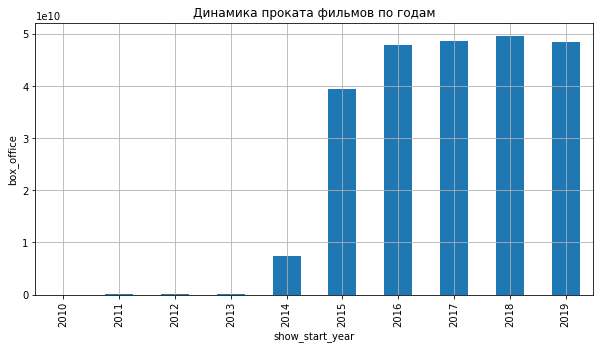

In [72]:
# группировка значений и 
# построение столбчатой диаграммы

df.groupby('show_start_year')['box_office'].sum().plot(
    x = 'show_start_year', y = 'box_office', kind = 'bar', grid = True, figsize = (10,5)
)
plt.title('Динамика проката фильмов по годам')
plt.ylabel('box_office')
plt.show()

Согласно столбчатой диаграмме мы видим, что с `2014` до `2018` происходит рост по сумме сборов, далее сумма сборов уменьшается.

В `2018` году самая максимальная сумма сборов была где то около `2 миллиардов`, а минимальная сумма была в `2010`. Далее мы видим, что в `2011`, `2012` и `2013` годах сумма сборов совсем немного выше `2010` года и не превышает `1,5 миллионов`.

Однако, согласно данным, не по всем годам дана полная информация о фильмах, вышедших в прокат, где то такая информация отсутствует в большей степени. Как раз таки в `2010`, `2011`, `2012` и `2013` подобная информация представлена в малом количестве от общего числа всех фильмов, которые получили прокатные удостоверения.

## Построение сводной таблицы для подсчёта средней и медианной суммы сборов для каждого года.

In [73]:
# создание сводной таблицы

table_box_office_mean_median = df.pivot_table(index = 'show_start_year' , values = 'box_office', aggfunc = ['mean', 'median'])
table_box_office_mean_median.columns = ['mean_box_office', 'median_box_office']
table_box_office_mean_median

,mean_box_office,median_box_office
show_start_year,,
2010,23130.04,1700.00
2011,129383.17,3000.00
2012,54339.24,5660.00
2013,161954.92,3522.50
2014,26684415.27,18160.00
2015,84940570.32,4920933.00
2016,91000569.85,3846679.40
2017,136032793.33,9968340.00
2018,104565059.23,8891102.20


Согласно сводной таблице мы видим, что средняя сумма сборов сильно отличается от медианной. Однако, при подсчёте значений с помощью медианы значения получаются более точные, поэтому медианная сумма сборов более верная по сравнению со средней.

Также, стоит отметить, что медианная сумма сборов в 2017 году самая высокая, а самая низкая в 2010 году. 

## Определение влияния возрастного ограничения аудитории на сборы фильма в прокате по годам. Определение фильмов с возрастным ограничением, собравших больше всего денег в прокате.  

In [74]:
# создание переменной 'df_period_of_years', где
# сохранён срез данных таблицы df

df_period_of_years = df.query('show_start_year >= 2015')

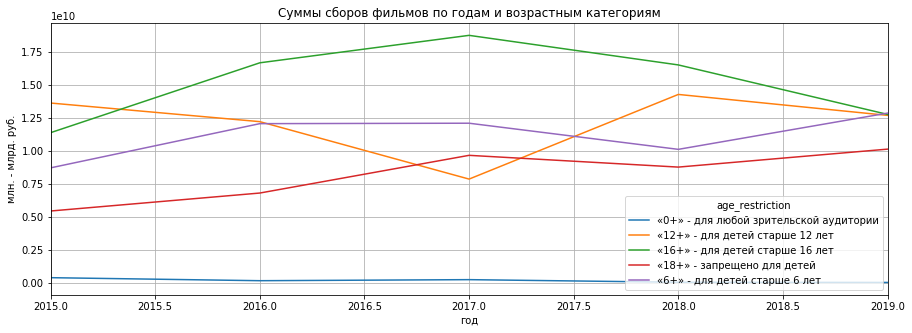

In [75]:
# создание сводной таблицы и 
# построение линейного графика

df_period_of_years.pivot_table(
    index = 'show_start_year', values = 'box_office', 
    columns = 'age_restriction', aggfunc = 'sum'
).plot(grid = True, figsize = (15,5))
plt.title('Суммы сборов фильмов по годам и возрастным категориям')
plt.ylabel('млн. - млрд. руб.')
plt.xlabel('год')
plt.show()

Согласно графику можно утверждать, что возрастное ограничение аудитории влияет на сборы фильма в прокате.

Мы видим, что фильмы с возрастным ограничением `16+` собрали больше всего денег в прокате, самый пик кассовых сборов наблюдается в 2017 году и составил около `1,9 миллиардов рублей`.

Также, можно заметить, что картина меняется в зависимости от года. Фильмы с возрастным ограничением `12+` имеют не такое стабильное положение по сравнению с фильмами других категорий. В начале `2015` года данные фильмы имели самый больший успех в плане кассовых сборов, однако после они стали опускаться до `2017` года и их кассовые сборы были практически ниже всех других фильмов, кроме `0+`. Однако, с `2017` они стали подниматся и к началу `2019` года достигли одинаковых показателей с фильмами, категории `16+` и `6+`.

Возможно, что смена фильмов с разным возрастным ограничением в определённое время зависит от популярности вида фильмов на тот момент, количества выпущенных фильмов с определённым возрастным ограничением и суммы кассового сбора соответственно.

## Исследование фильмов, которые получили государственную поддержку.

### Просмотр средств, выделяемых на поддержку кино.

In [76]:
# создание таблицы, где 
# указан срез данных по столбцу 'amount_of_support'

df_films_support = df.query('amount_of_support != 0 and amount_of_support != "nan"')

In [77]:
# просмотр таблицы df_films_support

df_films_support 

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,first_director,major_genre,amount_of_support
1281,пока еще жива,111005313,2013-10-11 12:00:00,художественный,"ано содействия развитию кинематографии ""ангел-...",Россия,А.Атанесян,"а.атанесян, м.бабаханов, р.бутко",«16+» - для детей старше 16 лет,0.00,26500000.00,79411900.00,Министерство культуры,8.10,"драма,мелодрама",365353.60,2013,А.Атанесян,драма,0.67
1448,бесславные придурки,111003314,2014-03-28 12:00:00,художественный,"ооо ""компания ""атк-студио""",Россия,А.Якимчук,а.тютрюмов,«12+» - для детей старше 12 лет,0.00,26000000.00,37142857.00,Министерство культуры,nan,не определён,28140.00,2014,А.Якимчук,не определён,0.30
1498,невидимки,111004213,2013-09-10 12:00:00,художественный,"ооо ""компания ""реал-дакота""",Россия,"Р.Давлетьяров, С.Комаров","р.давлетьяров, а.котелевский, а.олейников",«12+» - для детей старше 12 лет,0.00,107847945.00,176023490.00,Фонд кино,5.30,"комедия,фантастика",19957031.50,2013,Р.Давлетьяров,комедия,0.39
1524,берцы,111004314,2014-05-05 12:00:00,художественный,"ооо ""студия ""пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),л.антонова,«16+» - для детей старше 16 лет,0.00,28000000.00,40574140.00,Министерство культуры,4.20,драма,55917.50,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.31
1792,братья ч,111004414,2014-04-23 12:00:00,художественный,"ооо ""студия ""пассажир""",Россия,М.Угаров,"а.миндадзе, л.антонова",«16+» - для детей старше 16 лет,0.00,25000000.00,40015122.00,Министерство культуры,6.40,драма,232100.00,2014,М.Угаров,драма,0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7460,союз спасения,111022019,2019-12-26 12:00:00,художественный,"зао ""дирекция кино""",Россия,А.Кравчук,"а.максимов, к.эрнст",«12+» - для детей старше 12 лет,100000000.00,400000000.00,980000000.00,Фонд кино,6.00,"история,биография,драма",717703185.50,2019,А.Кравчук,история,0.49
7462,иван царевич и серый волк 4,114005019,2019-12-20 12:00:00,анимационный,"ооо ""студия анимационного кино ""мельница""",Россия,"Д.Шмидт, К.Феоктистов","с.сельянов, а.боярский",«6+» - для детей старше 6 лет,100000000.00,0.00,190000000.00,Фонд кино,6.70,"мультфильм,приключения,семейный",501069235.00,2019,Д.Шмидт,мультфильм,0.47
7470,вторжение,111022519,2019-12-23 12:00:00,художественный,"ооо ""арт пикчерс студия"", ооо ""водород 2011""",Россия,Ф.Бондарчук,"ф.бондарчук, м.врубель, а.андрющенко, д.рудовский",«12+» - для детей старше 12 лет,100000000.00,400000000.00,944000000.00,Фонд кино,5.70,"фантастика,боевик",nan,2019,Ф.Бондарчук,фантастика,0.47
7472,я свободен,111023019,2019-12-26 12:00:00,художественный,"ао ""тпо ""киностудия им. м.горького""",Россия,И.Северов,с.зернов,«12+» - для детей старше 12 лет,0.00,30000000.00,46154000.00,Министерство культуры,5.90,драма,nan,2019,И.Северов,драма,0.35


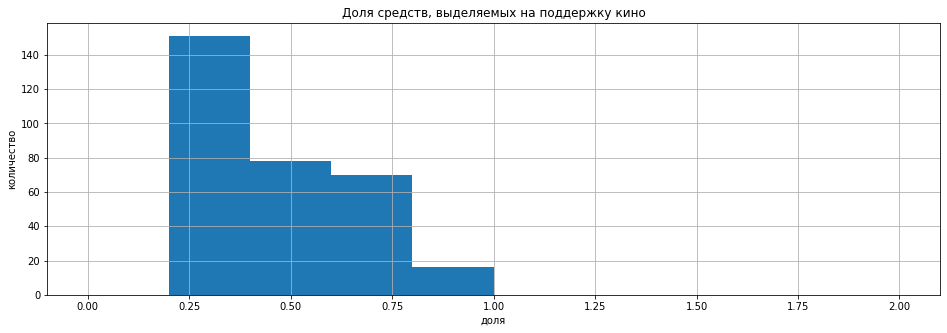

In [78]:
# построение гистограммы для столбца 'amount_of_support'

df_films_support.hist('amount_of_support', bins = 10, range = (0,2), figsize = (16,5))
plt.title('Доля средств, выделяемых на поддержку кино')
plt.xlabel('доля')
plt.ylabel('количество')
plt.show()

По гистограмме мы видим, что, в основном, доля средств, выделяемых на поддержку кино, значится в цифрах от `0.20` до `0.40` от общего бюджета.

Меньше всего встречаются случаи, когда доля государственной поддержки составляет от `0.80` до `0.96`.

Также, стоит заметить, что доля государственной поддержки начинается с цифры `0.20`, меньше доли средств, выделяемой на поддержку кино, не встречается.

### Просмотр окупаемости фильмов с государственной поддержкой.

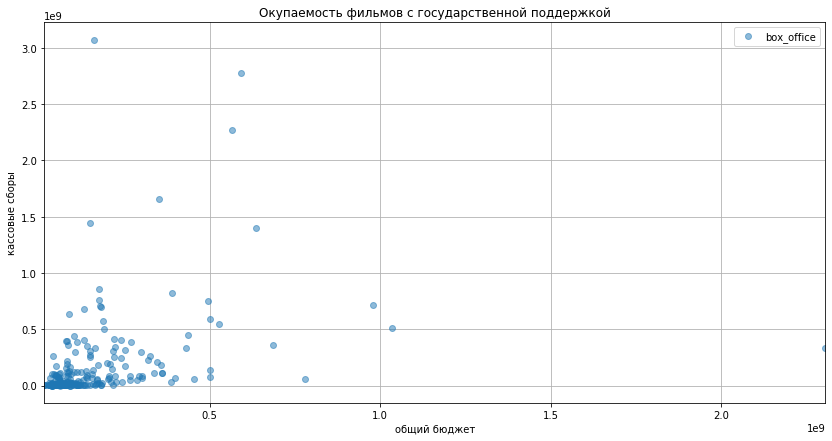

In [79]:
# построение точечной диаграммы

df_films_support.plot(
    x = 'budget', y = 'box_office', style = 'o' , grid = True, figsize = (14,7), alpha = 0.5 
) 
plt.title('Окупаемость фильмов с государственной поддержкой')
plt.xlabel('общий бюджет')
plt.ylabel('кассовые сборы')
plt.show()

По графику мы видим, что окупаемость существует, но, в большинстве случаев, она небольшая.

Есть значения, где кассовые сборы намного больше общего бюджета, однако, таких значений малое количество.

### Просмотр рейтинга фильмов с государственной поддержкой.

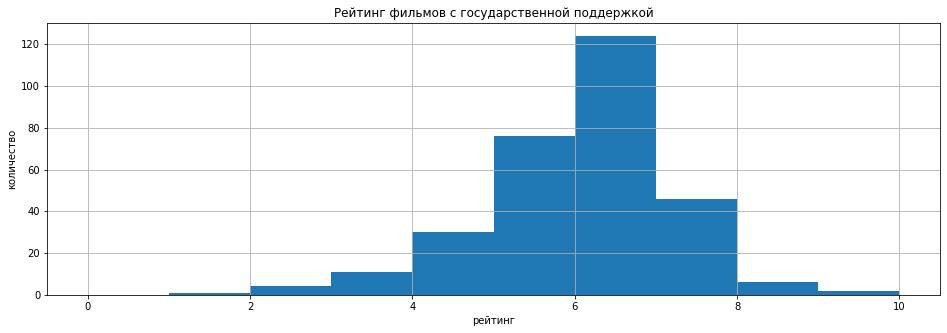

In [80]:
# построение гистограммы для столбца 'ratings'

df_films_support.hist('ratings', bins = 10, range = (0,10), figsize = (16,5))
plt.title('Рейтинг фильмов с государственной поддержкой')
plt.xlabel('рейтинг')
plt.ylabel('количество')
plt.show()

По гистограмме мы видим, что, в большинстве случаев, рейтинг фильмов с государственной поддержкой это цифры от `6.0` до `7.0`, что говорит о неплохих результатах и средней популярности данных фильмов.

Также, стоит отметить, что редко встречаются фильмы из данной категории с рейтингом `1.0` или `10.0`

# 5. Общий вывод <a id='intro4'></a>

В процессе исследования для начала мы провели предобработку данных:

1) заменили пропущенные значения в столбцах `film_studio`, `production_country`, `director`, `producer`, ` financing_source` и  `genres`;

2) перевели значения к типу `float` в столбце `ratings`;

3) изменили в столбце `show_stat_date` тип данных на `datetime` и убрали часовой пояс;

4) привели название столбца `puNumber` к нижнему регистру и добавили нижнее подчёркивание;

5) убрали в столбце:
* `title` лишние символы, пробелы в начале и в конце строки, тем самым удалили неявные дубликаты, привели значения к нижнему регистру;  
* `type` пробелы в начале и в конце строки, тем самым удалили неявные дубликаты, привели значения к нижнему регистру;  
* `production_country` и `director` пробелы в начале и в конце строки;
* `producer` лишние символы, пробелы в начале и в конце строки, привели значения к нижнему регистру.

6) заменили в столбце `film_studio` следующие значения: `Пикчерс` на `Пикчерз`, `Продакшен, Продакшнз, Продакшнс` на `Продакшн` и `Фильмс, Фильмз, Филмс` на `Филмз`, `Коламбиа, Каламбиа` на `Коламбия`, тем самым удалив неявные дубликаты и  привели значения к нижнему регистру. 

Далее сделали необходимы расчёты и добавили столбцы с новой информацией о фильмах, а именно:

* столбец `show_start_year` с информацией о годе проката;
* столбец `first_director` с именем и фамилией главного режиссёра и столбец `major_genre` с основным жанром фильма;
* столбец `amount_of_support` с долей государственной поддержки от общего бюджета.

Следующим шагом был исследовательский анализ данных, в котором мы выявили:

* С каждым годом доля фильмов, вышедших в прокат, возрастает. Самый максимум насчитывается в 2017 году, там доля составила 0.71 от общего числа фильмов, получивших прокатное удостоверение;


* В `2018` году самая максимальная сумма сборов была где то около `2 миллиардов`, а минимальная сумма была в `2010`. Однако, в `2011`, `2012` и `2013` годах сумма сборов совсем немного выше `2010` года и не превышает `1,5 миллионов`.


* Фильмы с возрастным ограничением `16+` собрали больше всего денег в прокате, самый пик кассовых сборов наблюдается в 2017 году и составил около `1,9 миллиардов рублей`. Однако, стоит отметить, что так было не всегда, в начале `2015` года самыми популярными были фильмы с ограничением в `12+`, а в начале `2019` сразу три категории фильмов: `6+`, `12+` и `16+`.

Однако, исходя из анализа, данные представлены и распределены по годам не в полном объёме, где то данных намного больше, а где то наоборот, поэтому для более точной информации, указанной выше, необходимо, чтобы были представлены приблизительные по количеству значения. 

* В основном, доля средств, выделяемых на поддержку кино, значится в цифрах от `0.20` до `0.40` от общего бюджета. Меньше всего встречаются случаи, когда доля государственной поддержки составляет от `0.80` до `0.96`;


* У фильмов с государственной поддержкой средний рейтинг от `6.0` до `7.0`, однако, окупаемость данных фильмов низкая, поэтому, можно сказать, что подобные фильмы интересны зрителю, но у них существует своя, определённая аудитория. 